# HW3
### Author: Harsh Tandon

<b>Instructions:</b> Write your answers in the empty code cells below.

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code does not work on different data</li>
<li>You use for loops (unless explicitly permitted)</li>
</ul>

## Problem

Start by executing the following code, which creates a Series object <b>stock</b> of share prices of Nvidia. 

In [103]:
import pandas as pd
import numpy as np
data = pd.read_csv('NVDA.csv',index_col=0)
data.index=data.index.astype(np.datetime64)
stock = data['Close']

C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\base.py:308: FutureWarning: Passing in 'datetime64' dtype with no precision is deprecated
and will raise in a future version. Please pass in
'datetime64[ns]' instead.
  dtype=dtype, **kwargs)


In [104]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Populating the interactive namespace from numpy and matplotlib


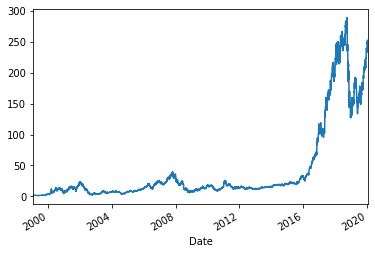

In [105]:
%pylab inline
stock.plot()

In [106]:
stock.head()
stock.tail()

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.671875
1999-01-27    1.666667
1999-01-28    1.661458
Name: Close, dtype: float64

Date
2020-01-22    250.110001
2020-01-23    252.860001
2020-01-24    250.479996
2020-01-27    240.199997
2020-01-28    247.970001
Name: Close, dtype: float64

Use the Series <i>stock</i> to answer the following questions.

## Question 1

### Q1.1, When is the first date this sotck close at more than 130 dollars? (pick the closest date in Camino)

In [107]:
(stock[stock > 130].sort_index()).index[0] 

Timestamp('2017-05-15 00:00:00')

### Q1.2, After stock price hit 130 dollar, how many trading days it took to reach the historical high? (pick the closest number of days in Camino)

In [153]:
lowID = stock[stock > 130].index[0] #the timestamp when stock went over 130 for the first time
highID = stock[stock > 130].nlargest().index[0] #the timestamp when stock reached the historical high

series = stock[(stock.index >= lowID) & (stock.index <= highID)] #series between the above two timestamps
len(series) #find the lenght of this series

349

### Question 2

### Find the top 5 largest one-day % gain (in % compared to the closing cost of the previous trading day). Make sure that your output is a Series object that shows both date and the % drop. (pick the date closest to the day with the largest gain ratio in Camino)

In [152]:
percentage_gain = (stock.shift(-1) - stock)/stock
percentage_gain.nlargest() #return a series of largest 5 gains

percentage_gain[percentage_gain == percentage_gain.max()] #for Camino to find largest gain ratio

Date
2000-03-06    0.424145
2003-05-08    0.330635
2001-01-02    0.306889
2016-11-10    0.298067
2000-03-10    0.264831
Name: Close, dtype: float64

Date
2000-03-06    0.424145
Name: Close, dtype: float64

## Question 3

###  With following investment strategy: buy on day 1, sell on day 3. If based on this strategy, what's the most dollars amount you can lose in one trading?  Also report the buying and selling date for that particular trade. ( pick the closest dollar amount it dropped in Camino)

In [154]:
profit = (stock.shift(-2) - stock) #find profits by buying on day 1 and selling on day 3
loss = profit.nsmallest(1).values[0] #find the smallest profit and store it in a variable named 'loss'
x = profit.nsmallest(1).index[0] #find the timestamp when the stock was bought
y = stock[stock == stock.shift(-2)[x]].index[0] #find the timestamp when the stock was sold
loss #print loss incurred
print("buying-date/selling-date : ", x.date(), "/", y.date()) #print buying and selling date

-57.69000199999999

buying-date/selling-date :  2018-11-15 / 2018-11-19


## Question 4

### In which days did we observe that the price has increased of more than 60% within the 9 preceding trading sessions? Report your result as a Series (d,gain) where *d* is the trading session date when the increase was observed and *gain* is the maximum percentage gain (%) observed over the 9 days preceding session(today compare with previous 9 trading days).
#### *Hint:* use a **rolling** minimum . Today + 9 more days -> use rolling(10). (pick the closest date that has the highest gain ratio in Camino) 

In [156]:
rol = stock.rolling(10).min() #find rolling minimum to see when we should buy
profit = (stock - rol)/rol #find profits
profit[profit > 0.6].sort_values(ascending = False) #print if profits are more than 60%

profit[profit > 0.6].sort_values(ascending = False)[[0]] #for camino to find the largest gain ratio

Date
2000-03-13    1.576052
2000-03-10    1.036677
2000-03-14    0.900755
2000-03-15    0.823085
2000-02-18    0.770115
2000-03-09    0.731122
2000-03-17    0.707265
2001-10-12    0.693048
2001-10-15    0.685511
2000-02-22    0.642633
2000-02-23    0.611621
2000-03-16    0.609776
2001-01-11    0.603340
Name: Close, dtype: float64

Date
2000-03-13    1.576052
Name: Close, dtype: float64

## Question 5

### What was the **worst** possible "buy&sell" operation? Find the two days x and y so that the % loss resulting from buying in x and selling in y (with y after x) is maximized. Your code should work for any data. 
#### *Hint:* Use method cummax() or method cummin(). *Cummax/Cummin* returns the maximum/minimum value encountered so far. Make sure to return the trading days x and y, as well as the % loss resulting from buying in x and selling in y.
#### (Fill in blank for the buying and selling dates in Camino with the format 'buying-date/selling-date' (for example, 2001-01-01/2010-12-31)

In [157]:
minPrice = stock.sort_index(ascending = False).cummin() #find the lowest price to sell in a descending order of index.

profit = (minPrice - stock)/stock #find profits
x = profit.nsmallest(1).index[0] #find timestamp of buying the stock that resulted in smallest profit
loss = profit.nsmallest(1).values[0] #find the smallest profit (or maximum loss)
y = stock[stock == minPrice[x]].tail(1).index[0] #find the timestamp of selling the stock that resulted in smallest profit

print("buying-date/selling-date : ", x.date(), "/", y.date()) #print buy and sell dates
loss #print loss incurred

buying-date/selling-date :  2002-01-03 / 2002-10-09


-0.8972249226823338

In [158]:
#another way using cummax() function
maxPrice = stock.cummax()

profit = (stock - maxPrice)/maxPrice
y = profit.nsmallest(1).index[0]
loss = profit.nsmallest(1).values[0]
x = stock[stock == maxPrice[y]].tail(1).index[0]
print("buying-date/selling-date : ", x.date(), "/", y.date())
loss

buying-date/selling-date :  2002-01-03 / 2002-10-09


-0.8972249226823338